In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

merge_data = pd.read_csv('data_sources/merge_data.csv')

In [10]:
Urban= merge_data[merge_data["Type"]=="Urban"]
Rural= merge_data[merge_data["Type"]=="Rural"]
Suburban= merge_data[merge_data["Type"]=="Suburban"]
Urban.head()

,Unnamed: 0,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index
210,210,78701,Austin,Travis County,Urban,Central,247179.44,2011,5084,12.0,73.1,7.6,0.0,6.6,0.7,100.0,0.441058
211,211,78701,Austin,Travis County,Urban,Central,248615.10,2012,5642,14.1,70.3,5.7,0.0,8.0,1.9,100.0,0.475900
212,212,78701,Austin,Travis County,Urban,Central,250772.55,2013,5915,13.8,70.7,5.2,0.0,7.7,2.6,100.0,0.471798
213,213,78701,Austin,Travis County,Urban,Central,254295.37,2014,6188,14.5,68.4,4.9,0.0,9.5,2.6,99.9,0.499017
214,214,78701,Austin,Travis County,Urban,Central,259944.74,2015,7051,14.1,69.3,3.8,0.2,9.4,3.2,100.0,0.488562


In [11]:
urban_com= merge_data[merge_data["Type"]== "Urban"][["Diversity Index","Value"]]
sub_com= merge_data[merge_data["Type"]== "Suburban"][["Diversity Index","Value"]]
rural_com= merge_data[merge_data["Type"]== "Rural"][["Diversity Index","Value"]]

In [12]:
stats.f_oneway(urban_com,sub_com,rural_com)

F_onewayResult(statistic=array([12.84756769, 20.45557918]), pvalue=array([3.62029435e-06, 2.88644238e-09]))

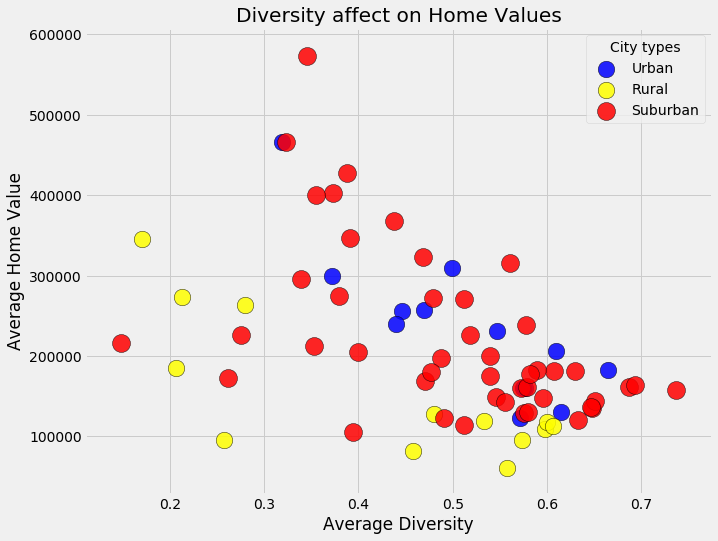

In [13]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
plt.grid()
Urban_Div= Urban.groupby(["Zip"])["Diversity Index"].mean()
Urban_HV= Urban.groupby(["Zip"])["Value"].mean()

Rural_Div= Rural.groupby(["Zip"])["Diversity Index"].mean()
Rural_HV= Rural.groupby(["Zip"])["Value"].mean()

Suburban_Div= Suburban.groupby(["Zip"])["Diversity Index"].mean()
Suburban_HV= Suburban.groupby(["Zip"])["Value"].mean()

plt.scatter(Urban_Div,Urban_HV, facecolor= "blue", alpha=0.85, edgecolor= "black", marker="o", label= "Urban", s=3*Urban["Zip"].count())
plt.scatter(Rural_Div,Rural_HV, facecolor= "yellow", alpha=0.85, edgecolor= "black", marker="o", label= "Rural", s=3*Rural["Zip"].count())
plt.scatter(Suburban_Div, Suburban_HV, facecolor= "red", alpha=0.85, edgecolor= "black", marker="o", label= "Suburban", s= Suburban["Zip"].count())

plt.xlabel("Average Diversity")
plt.ylabel("Average Home Value")
plt.title("Diversity affect on Home Values")
plt.grid()
# Create a legend
plt.legend(title="City types")
plt.savefig("images/01-01-godwin-scatter.png")
plt.show()

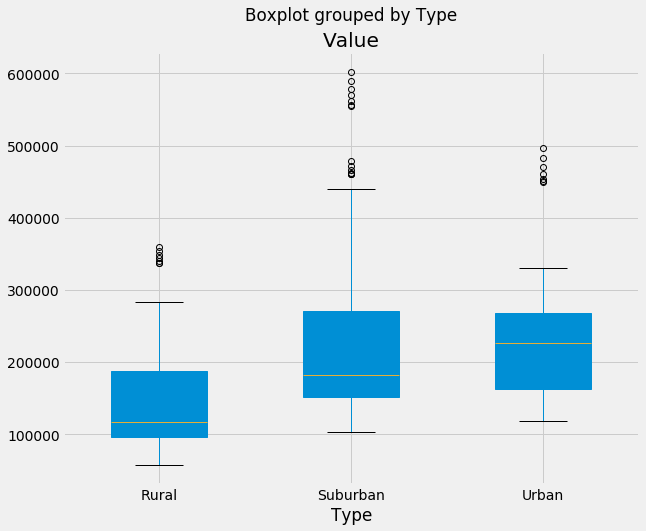

In [14]:
plt.rcParams['figure.figsize']=(10,8) # set the figure size
#plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

compare_bp= merge_data.boxplot("Value", by="Type", widths = 0.5, patch_artist = True)
plt.savefig("images/01-02-godwin-boxplot.png")

### Conclusion: 
Since the p-value indicate that the p-value is less than .05, it rejects the null hypothesis and support our hypothesis that there is a big correlation between property value and diversity. I took it further and went into how it affects different city types and from the looks of it, it seems like rural areas takes the most hit when it comes to how diversity index affects the property value but overall, it indicates that as diversity index increases, property value across all city types decreases.